In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\muthuraj.jayaseelan\diabetes.csv")

In [2]:
df.shape

(768, 9)

In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
y = df["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [15]:
x = df.drop("Outcome",axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [33]:
model.score(x_test,y_test)

0.7922077922077922

In [34]:
#Prediction
y_predict = model.predict(x_test)
datasetComparsion = pd.DataFrame({'Actual ':y_test,'Predicted ':y_predict})
print(datasetComparsion)

     Actual   Predicted 
661        1           1
122        0           0
113        0           0
14         1           1
529        0           0
..       ...         ...
476        1           0
482        0           0
230        1           0
527        0           0
380        0           0

[154 rows x 2 columns]


In [35]:
#Generate Confusion Matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_predict)
print(cf_matrix)

[[93 14]
 [18 29]]


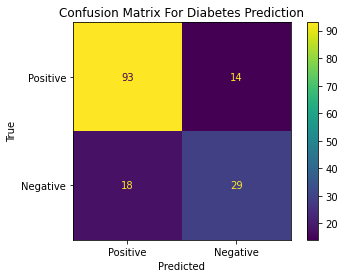

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cf_matrix,display_labels=['Positive','Negative'])
disp.plot()
disp.ax_.set(xlabel='Predicted',ylabel='True')
disp.ax_.set_title('Confusion Matrix For Diabetes Prediction using GaussianNB')
plt.show()

In [37]:
from sklearn.metrics import classification_report
target_names = ['Positve','Negative']
print(classification_report(y_test,y_predict,target_names=target_names))

              precision    recall  f1-score   support

     Positve       0.84      0.87      0.85       107
    Negative       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



In [39]:
len(x_train)

614